In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

df = pd.read_csv('../data/weather_dataset.csv')
data = pd.DataFrame(df)

data.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [9]:
df.info()
print('--------------------------------------------------------------------')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
--------------------------------------------------------------------


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


### 1.Find all the unique 'Wind speed' values in the data

In [7]:
data.head(2)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog


In [10]:
data.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [14]:
wind_speed = data["Wind Speed_km/h"]
print(f"unique wind speed count: {wind_speed.nunique()}")
print("--------------------------------------")
print("unique wind speed: ")
print(sorted(wind_speed.unique()))

unique wind speed count: 34
--------------------------------------
unique wind speed: 
[0, 2, 4, 6, 7, 9, 11, 13, 15, 17, 19, 20, 22, 24, 26, 28, 30, 32, 33, 35, 37, 39, 41, 43, 44, 46, 48, 50, 52, 54, 57, 63, 70, 83]


### 1.2 Wind Speed — Distribution
Now we visualize how frequently each wind speed occurs.  



Number of Unique Wind Speeds: 34
--------------------------------------
Wind Speed Values: [ 4  7  6  9 15 13 20 22 19 24 30 35 39 32 33 26 44 43 48 37 28 17 11  0
 83 70 57 46 41 52 50 63 54  2]


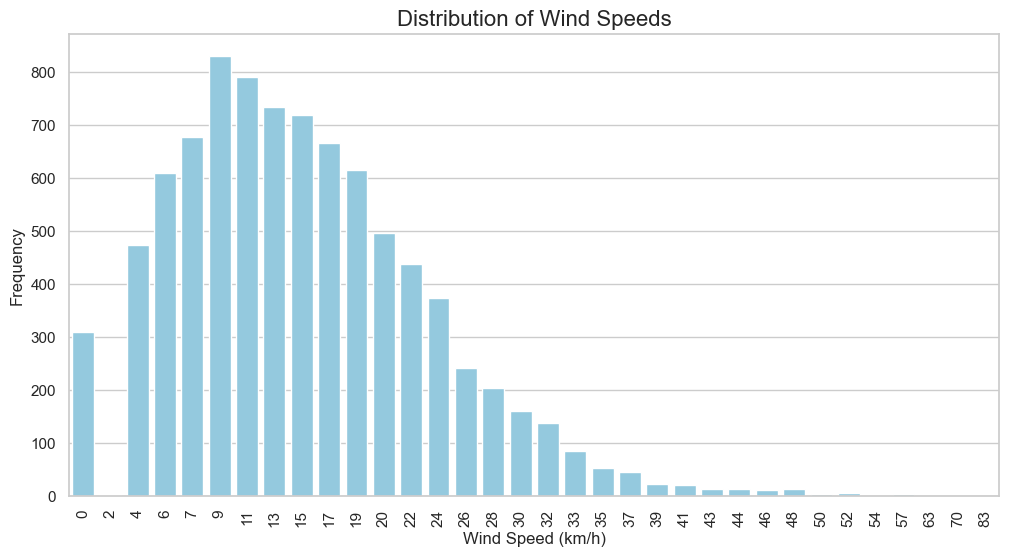

In [18]:
unique_count = data["Wind Speed_km/h"].nunique()
unique_values = data["Wind Speed_km/h"].unique()

print(f"Number of Unique Wind Speeds: {unique_count}")
print("--------------------------------------")
print("Wind Speed Values:", unique_values)

plt.figure(figsize=(12,6))
sns.countplot(x="Wind Speed_km/h", data=data, color="skyblue")

plt.title("Distribution of Wind Speeds", fontsize=16)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


### 1.3 Wind Speed — Binned Distribution (Histogram)
When many unique speeds exist, a histogram shows the overall shape more clearly.




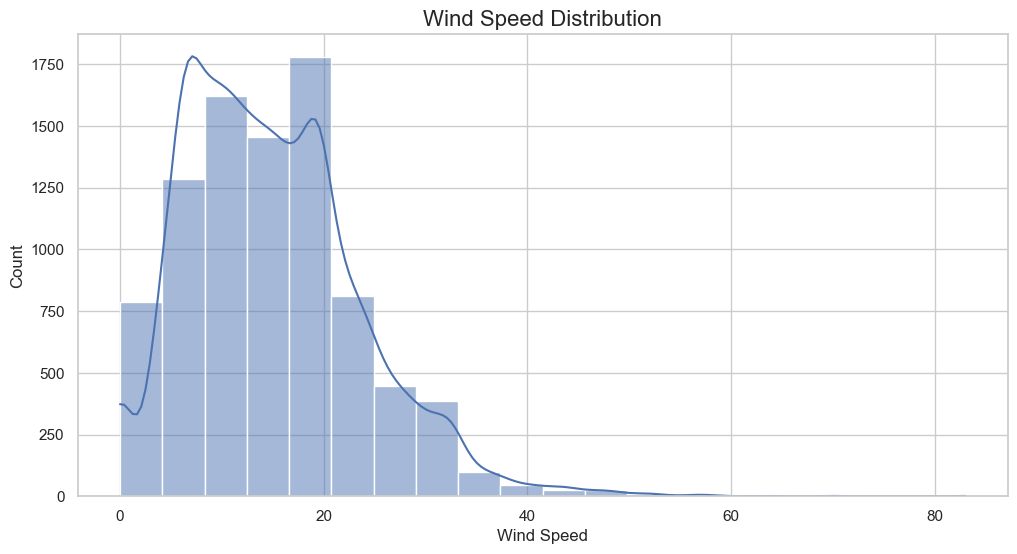

In [17]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x="Wind Speed_km/h", bins=20, kde=True)
plt.title("Wind Speed Distribution", fontsize=16)
plt.xlabel("Wind Speed")
plt.ylabel("Count")
plt.show()
